![Aeropython Logo](/files/imagenes/aeropython_logo.png)

In [1]:
%matplotlib inline
import numpy as np
from nash import create_world, plot_world, neighbourhood, weighted_choice_sub

#Equilibrios

Los sistemas complejos consisten en un conjunto de elementos que interactúan entre sí según unas determinadas reglas. Fruto de estas interacciones el sistema es dinámico, evoluciona.

Aunque no tiene por qué, puede darse la situación, sin embargo, de que el sistema alcance un estado en el que nada cambie si se siguen aplicando las mismas reglas. Se dice entonces que el sistema está en equilibrio.

#Equilibrios de Nash/Cournot, el dilema del prisionero

Los equilibrios de Nash/Cournot son el tipo de equilibrio que se alcanza cuando los elementos de un sistema complejo toman decisiones de manera egoísta dependiendo del estado del resto del sistema. Esto es, todos los elementos intentan maximizar su beneficio en una determinada situación y se puede dar el caso de que el sistema alcance un determinado estado de equilibrio. El ejemplo clásico de este tipo de equilibrios es el dilema del prisionero, que se enuncia así:

> Dos criminales que han participado en un robo son capturados por la policía, aislados e interrogados. A ambos les ofrecen el mismo trato: si confiesan y el otro no, el traidor sale libre y el otro cumple 3 años de condena; en cambio si ambos confiesan, ambos serán condenados a 2 años y si ninguno lo hace, ambos serán condenados a 1 año.

|                              | Prisionero A no confiesa | Prisionero A confiesa |
|------------------------------|--------------------------|-----------------------|
| **Prisionero B no confiesa** | A, B = -1                | A = 0; B = -3         |
| **Prisionero B confiesa**    | A = -3; B = 0            | A = B = -2            |

Desde la perspectiva de cada uno de los prisioneros, para mejorar su situación deben confesar, independientemente de lo que haga su compañero. Si el prisionero B confesara, el prisionero A debería confesar también, para reducir su pena. Asimismo, si el prisionero B no confesara, el prisionero A debería traicionarle e irse libre. Este tipo de estrategia lleva indefectiblemente a que ambos prisioneros confiesen y cumplan 2 años, cuando podrían haber cumplido menos si se hubieran colaborado. Una vez en esta situación, la de que ambos confiesen, ninguno de los dos querría cambiar de idea, pues supondría necesariamente aumentar su pena, estaremos en un equilibrio de Nash.

#El desarme mundial

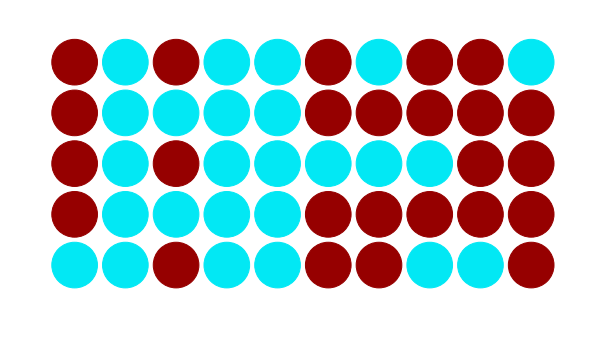

In [2]:
mundo = create_world(5, 10)
plot_world(mundo)

##Un mundo egoísta

En los años posteriores a la II Guerra Mundial, el mundo vio una carrera armamentística global, provocada por el miedo y la paranoia. La siguiente tabla representa los niveles de miedo que padece el país A dependiendo de si sus vecinos poseen o no armas nucleares:

|                              | Países vecinos no armados | Países vecinos armados |
|------------------------------|:-------------------------:|:----------------------:|
| **País A no armado**         | 0                         | -3                      |
| **País A armado**            | 0                         | -2                      |

Curiosamente, a los equilibrios de Nash también se les llama **equilibrios del miedo**. Si un país aplica una estrategia de minimización del miedo y resulta que tiene un vecino que está armado, intentará producir sus propias armas atómicas. Veamos qué ocurre a largo plazo en un mundo donde todo el mundo tiene miedo y decide protegerse a toda costa (pista: hay dos equilibrios de Nash)

In [3]:
def calculate_next_state (world):
    
    old_world = np.array(world)
            
    for ii in range(world.shape[0]):
        
        for jj in range(world.shape[1]):
            
            if any(neighbour == 1 for neighbour in neighbourhood(old_world, ii, jj, 1)):
                
                world[ii, jj] = 1

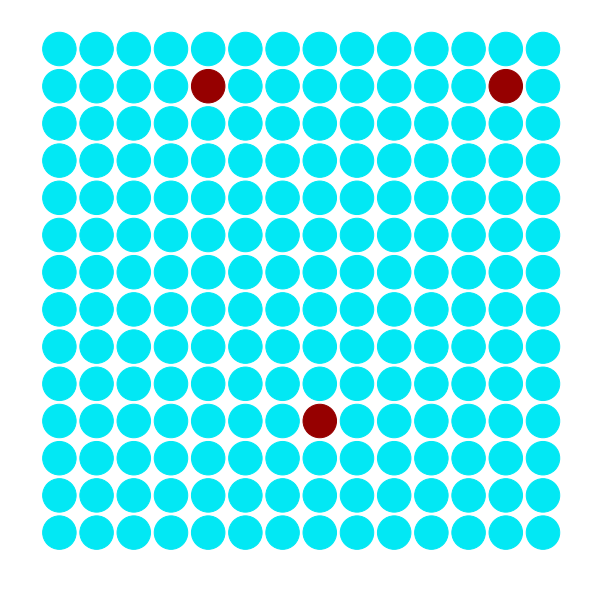

In [4]:
mundo = create_world(14, 14, 0.015)
plot_world(mundo)

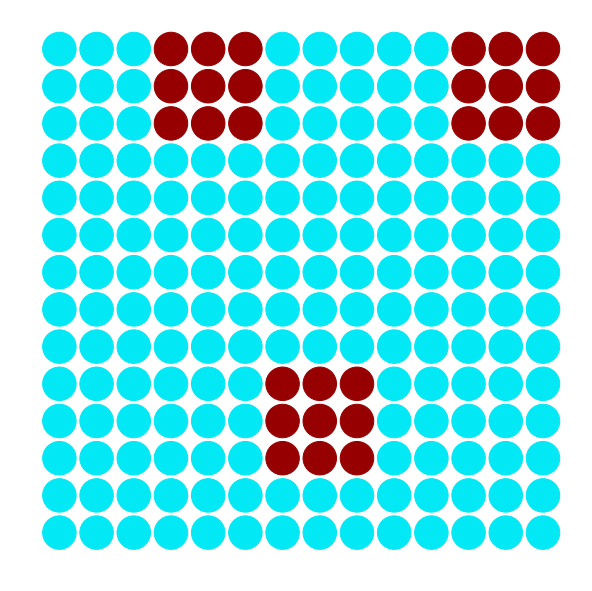

In [5]:
#Corre esta celda repetidas veces para ver cómo evoluciona el mundo
calculate_next_state (mundo)
plot_world(mundo)

##Un mundo generoso

Ahora, veamos qué pasaría si en vez de ser egoístas, todos los países persiguieran aumentar su seguridad siempre y cuando esto no implicara perjudicar a sus vecinos. Manteniéndose la misma tabla de pagos, en este caso se está persiguiendo un **óptimo de Pareto**.

|                              | Países vecinos no armados | Países vecinos armados |
|------------------------------|:-------------------------:|:----------------------:|
| **País A no armado**         | 0                         | -3                      |
| **País A armado**            | 0                         | -1                      |

In [6]:
def calculate_next_state (world):
    
    old_world = np.array(world)
    threat = np.zeros(world.shape, dtype='int')
    
    for ii in range(world.shape[0]):
        
        for jj in range(world.shape[1]):
            
            if (old_world[ii, jj] == 0) & (any(neighbour == 1 for neighbour in neighbourhood(old_world, ii, jj, 1))):
            
                threat [ii,jj] = -3
                
            elif (old_world[ii,jj] == 1) & (list(neighbourhood(old_world, ii, jj, 1)).count(1)>1):
                
                threat [ii,jj] = -1
                
            
    for ii in range(world.shape[0]):
        
        for jj in range(world.shape[1]):
            
            if (old_world[ii, jj] == 0) & (all(neighbour_threat !=0 for neighbour_threat in neighbourhood(threat, ii, jj, 1))):
                
                world[ii, jj] = 1

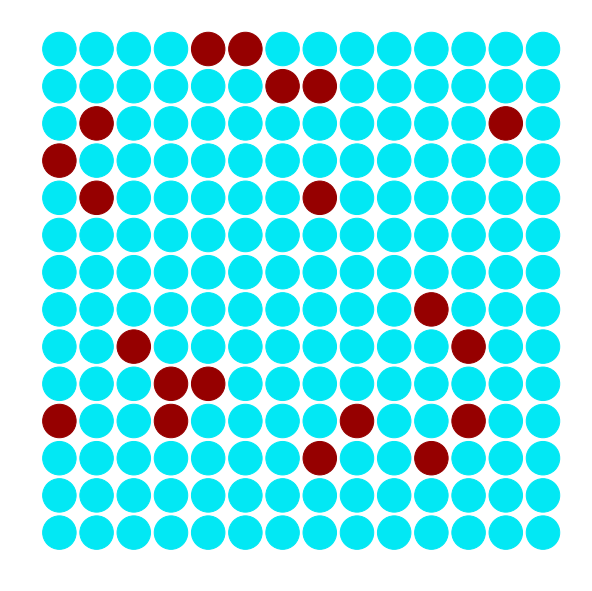

In [7]:
mundo = create_world(14, 14, 0.1)
plot_world(mundo)

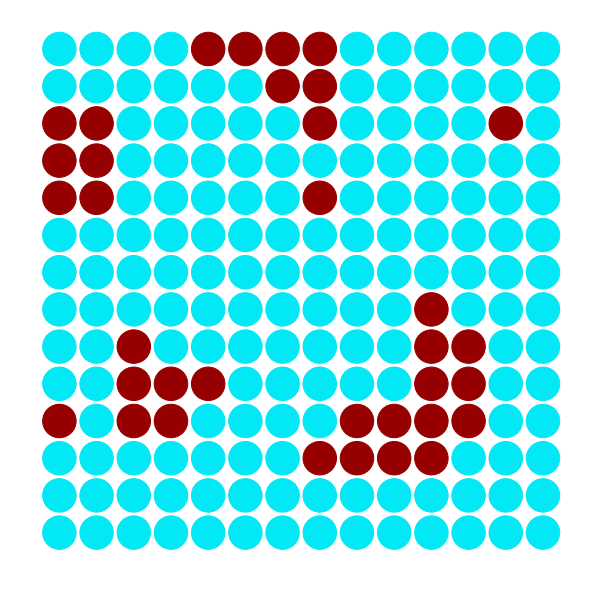

In [8]:
#Corre esta celda repetidas veces para ver cómo evoluciona el mundo
calculate_next_state (mundo)
plot_world(mundo)

Vemos que en este caso el desarrollo armamentístico queda mucho más contenido.

##La importancia de la confianza

La estrategia anterior es efectiva para evitar la militarización del planeta. Sin embargo, veremos que hay una estrategia aún mejor. En 1968 se firmó el Tratado de No Proliferación Nuclear, suscrito por 190 países. Este tratado sólo reconoce el derecho de posesión de armas nucleares a Estados Unidos, Rusia, China, Reino Unido y Francia y establece fuertes sanciones (y amenazas) al resto de países, si intentan desarrollarlas. Por otro lado, los países con armamento nuclear se **comprometen** a hacer un uso responsable del mismo y establecen alianzas militares (como la OTAN), que tranquilizan a los países que se acogen a ellas. En estas circunstancias, la tabla de pagos cambia y pasa a ser:

|                              | Países vecinos no armados | Países vecinos armados |
|------------------------------|:-------------------------:|:----------------------:|
| **País A no armado**         | 0                         | -2                     |
| **País A armado**            | -2                        | -2                     |

Como vemos, con la nueva situación, no sólo se incentiva el no-desarrollo de armas nucleares, sino que además se incentiva su desaparición.

In [9]:
def calculate_next_state (world):
    
    old_world = np.array(world)
            
    for ii in range(world.shape[0]):
        
        for jj in range(world.shape[1]):
            
            if (old_world[ii, jj] == 1) & (list(neighbourhood(old_world, ii, jj, 1)).count(1)==1):
                
                world[ii, jj] = 0

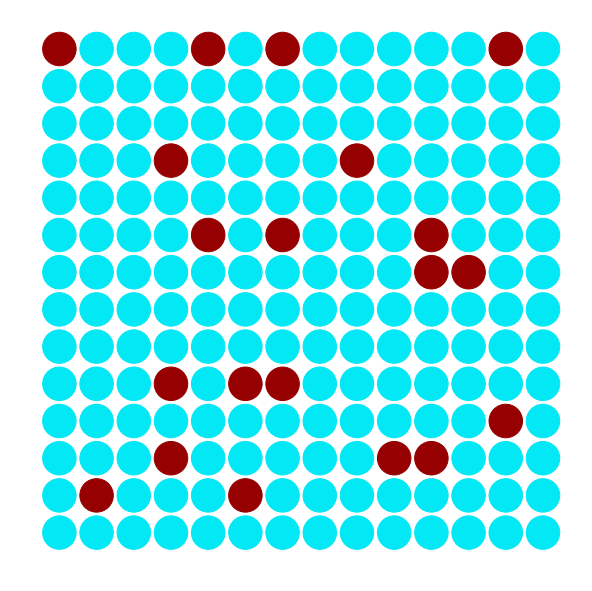

In [10]:
mundo = create_world(14, 14, 0.1)
plot_world(mundo)

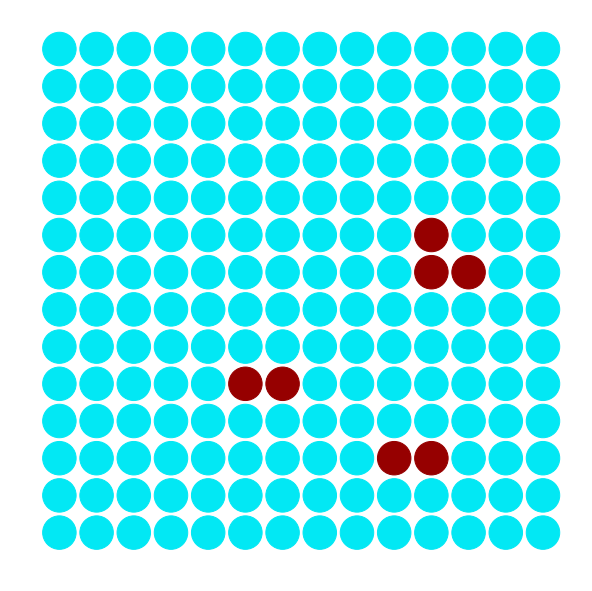

In [11]:
#Corre esta celda repetidas veces para ver cómo evoluciona el mundo
calculate_next_state (mundo)
plot_world(mundo)

Como se ve, todos los países que no tienen vecinos armados acaban desapareciendo y se alcanza un nuevo equilibrio. En el mundo real, en lo que armamento militar se refiere, todos los países son vecinos entre sí, lo que explica que ninguna potencia militar haya desmantelado completamente su arsenal. Sin embargo, esta estrategia diplomática ha sido todo un éxito a la hora de frenar las aspiraciones nucleares del resto de países.

#Las manos fuertes del mercado

Existen también sistemas, que llegan a un equilibrio de manera no determinista, sino fuertemente influenciados por el azar. Imaginemos un mercado financiero formado por unos 1000 inversores. En un momento determinado, algunos de estos inversores estarán comprando y otros estarán vendiendo:

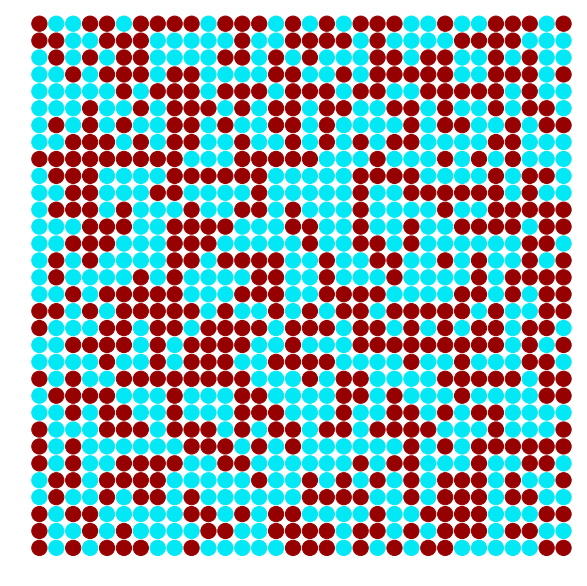

In [20]:
bolsa = create_world(32, 32, 0.5)
plot_world(bolsa)

Los agentes bursátiles son seres particulares, que guían sus decisiones observando y prediciendo tendencias. Imaginemos que en cada momento la probabilidad de que un agente compre o venda algo es la proporción en que esto esté ocurriendo con un producto en concreto (en un vecindario en concreto):

In [21]:
def calculate_next_state (world):
    
    old_world = np.array(world)
    probability = np.zeros(world.shape)
    
    for ii in range(world.shape[0]):
        
        for jj in range(world.shape[1]):
            
            neighbourhood_list = list(neighbourhood(old_world, ii, jj, int(min(world.shape[0],world.shape[1])/4)))            
            probability[ii, jj] = neighbourhood_list.count(1) / len(neighbourhood_list)
            
    #print(probability)
            
    for ii in range(world.shape[0]):
        
        for jj in range(world.shape[1]):
            
            world [ii, jj] = weighted_choice_sub([1 - probability[ii, jj], probability[ii, jj]] )

Si observamos cómo evoluciona a lo largo del tiempo, vemos que este sistema generará fuertes tendencias al alza o a la baja, imposibles de determinar de antemano debido a lo caótico del mismo:

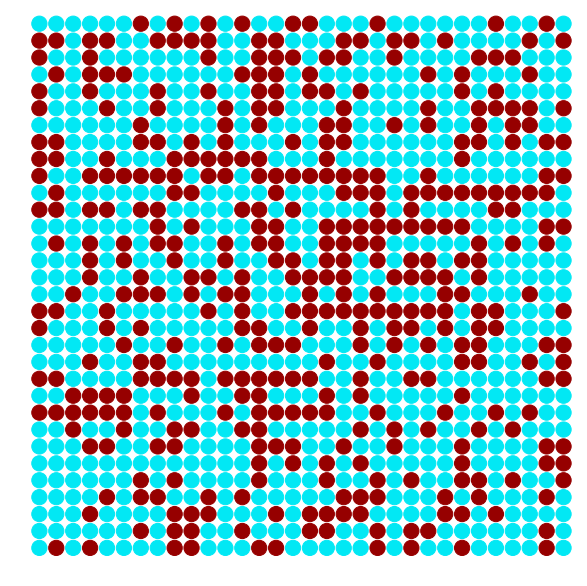

In [22]:
#Corre esta celda repetidas veces para ver cómo evoluciona el mundo
for iteration in range(300):
    calculate_next_state (bolsa)
plot_world(bolsa)

En cambio, si una "mano fuerte" decide vender o comprar, determina la tendencia del mercado:

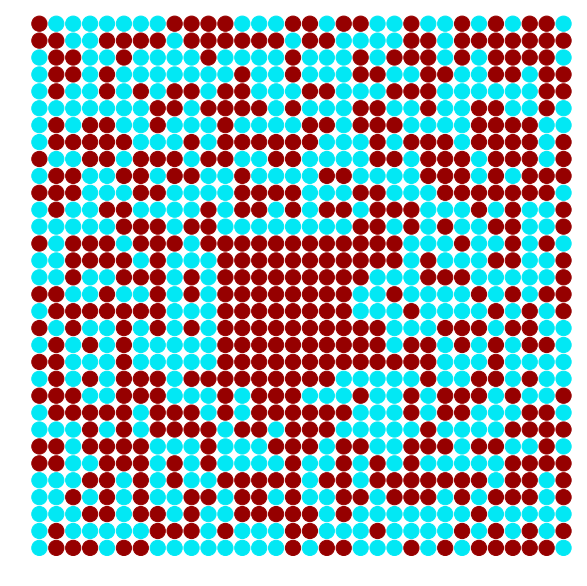

In [16]:
bolsa = create_world(32, 32, 0.5)
bolsa[11:19, 11:19] = 1
plot_world(bolsa)

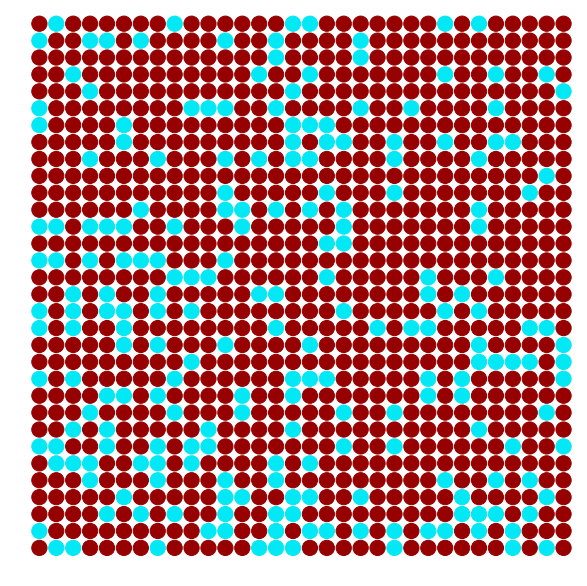

In [17]:
#Corre esta celda repetidas veces para ver cómo evoluciona el mundo
for iteration in range(300):
    calculate_next_state (bolsa)
plot_world(bolsa)

Carlos Dorado, Aeropython, 20 de Noviembre de 2015